<a href="https://colab.research.google.com/github/elenuco/PythonClass/blob/master/practicasKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Los objetivos de esta práctica son:

1. Comprender intuitivamente el único parámetro de KNN, **K**
2. Sintonizar el parámetro K, graficando la evaluación de clasificadores con distintos valores de K

Hecho con ❤ por el Disrupteam_

> **Recuerda**: A medida que avencemos, los ejercicios son más complicados. Es parte del aprendizaje. Afortunadamente no estás solo. ¿Tienes problemas o dudas? Solicita una sesión personal en *Bienvenida al curso > Formulario para solicitar mentorías*



---
**Iniciemos**

**Objetivo 1: Comprender intuitivamente el único parámetro de KNN, K**

Para usar los datos, hemos seguido los siguientes pasos:

1.  Cargar los datos
2.  Separar las características (atributos) de las etiquetas (target)
3.  Si es necesario, preparalos (pre procesarlos)


In [ ]:
# 1. Cargar los datos
from sklearn.datasets import load_breast_cancer
BreastCancerDataset = load_breast_cancer() 

# 2. Separar las características (atributos) de las etiquetas (target)
X = BreastCancerDataset.data      # X contiene los atributos
y = BreastCancerDataset.target    # y contiene las etiquetas

# 3. Si es necesario, preparalos (pre procesarlos)
# Para usar KNN es preferible normalizar los datos 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

El clasificador basado en KNN se llama *KNeighborsClassifier* en Sklearn.

Para usarlo, procedemos como sigue:

1. Importar modelo
2. Crear modelo con los parámetros seleccionados
3. Dividir datos en entrenamiento y evaluación
4. Entrenar el modelo con el conjunto de entrenamiento
5. Evaluar o usar el modelo con el conjunto de prueba o evaluación
6. Calcular la exactitud

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3) # Usando 3 vecinos. K=3

# Dividir el conjunto de datos en "entrenamiento" y prueba. Propiamente dicho, KNN no necesita entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

¿Cuánto tiempo tarda el modelo en entrenar y predecir?

In [ ]:
from time import time

t0 = time()
clf.fit(X_train, y_train)
print("Tiempo de entrenamiento: ", time()-t0, " segundos")

t0 = time()
clf.predict([X[58,:]])
print("Tiempo de predicción: ", time()-t0, " segundos")

Tiempo de entrenamiento:  0.006594419479370117  segundos
Tiempo de predicción:  0.0028142929077148438  segundos


Evaluar el modelo

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9707602339181286

Podemos mejorar la exactitud afectando el límite de decisión que construye el modelo. Para esto solo tenemos un parámetro, K. Ahora, usemos K=10. ¿Mejoró la exactitud?

In [ ]:
clf = KNeighborsClassifier(n_neighbors=10)

t0 = time()
clf.fit(X_train, y_train)
print("Tiempo de entrenamiento: ", time()-t0, " segundos")

t0 = time()
clf.predict([X[58,:]])
print("Tiempo de predicción: ", time()-t0, " segundos")

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

Tiempo de entrenamiento:  0.0026090145111083984  segundos
Tiempo de predicción:  0.0015819072723388672  segundos


0.9707602339181286

¿Es más tardada la predicción con más vecinos? ¿Por qué?



---

**Objetivo 2: Sintonizar el parámetro K, graficando la evaluación de clasificadores con distintos valores de K**

Sintonizar significa ajustar convenientemente los parámetros de un modelo. Todos los paramétros que podemos ajustar de un modelo reciben el nombre de **hiperparámetros** o también **parámetros libres**.

* ¿Cómo podemos elegir el mejor valor de K? En otras palabras, ¿cómo podemos sintonizar el hiperparámetro de KNN, K?

Una forma es creando varios clasificadores con distintos valores de K. Podemos graficar su exactitud, y elegir el clasificador con el mejor desempeño.

In [ ]:
from sklearn.metrics import accuracy_score

# Lista para almacenar los resultados de cada clasificador
k_accuracy = []
# Valores de K para probar
k_range = range(1, 31)

# K iniciará en 1, y avanzará una unidad hasta llegar a 30
for k in k_range:  
    # Crear clasificador con el hiperparámetro k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    # Ralizar una evaluación cruzada
    accuracy = accuracy_score(y_test,y_pred)
    # Guardar el promedio en la lista k_scores
    k_accuracy.append(accuracy)

# Esta línea está fuera del ciclo for. Imprime los promedios de los clasificadores
print(k_accuracy)

[0.9590643274853801, 0.9415204678362573, 0.9707602339181286, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9590643274853801, 0.9649122807017544, 0.9707602339181286, 0.9649122807017544, 0.9707602339181286, 0.9707602339181286, 0.9707602339181286, 0.9590643274853801, 0.9590643274853801, 0.9590643274853801, 0.9590643274853801, 0.9532163742690059, 0.9649122807017544, 0.9590643274853801, 0.9590643274853801, 0.9532163742690059, 0.9590643274853801, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315]


Graficar

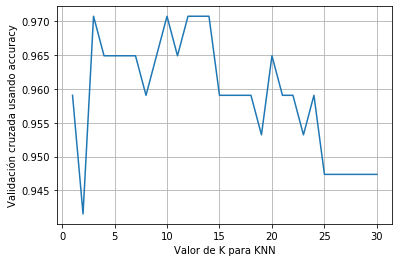

In [ ]:
import matplotlib.pyplot as plt   

plt.plot(k_range, k_accuracy)
plt.xlabel('Valor de K para KNN')
plt.ylabel('Validación cruzada usando accuracy')
plt.grid()
plt.show()

En el miniproyecto de este laboratorio, usarás más de un modelo para elegir al mejor